In [5]:
# Import necessary libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [8]:
# Read an image file in grayscale mode
img_array = cv2.imread('D:/Projects/Drowsiness Detection/Paper/train/Open_Eyes/Zulfiqar_Ahmed_0001.jpg', cv2.IMREAD_GRAYSCALE)

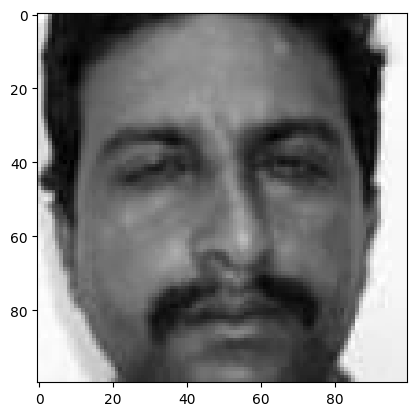

In [9]:
plt.imshow(img_array, cmap="gray")

In [4]:
# Get the shape (height, width) of the image array
img_shape = img_array.shape

(100, 100)

In [5]:
import os

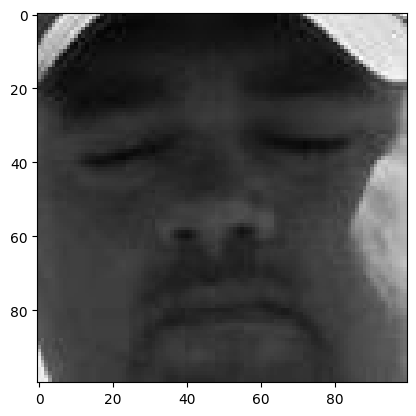

In [6]:
Datadirectory = 'G:/Projects/Drowsiness Detection/Paper/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = '.../train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    # Convert the grayscale image back to RGB
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

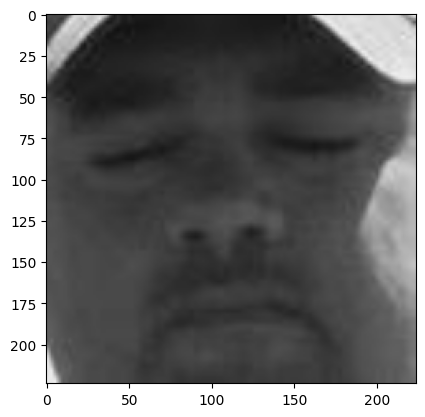

In [7]:
# Resize the image to a fixed size
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))

# Display the resized image
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
training_data = []
def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass


In [9]:
create_training_data()

In [ ]:
# Print the length of the training_data list
print(len(training_data))


In [11]:
import random

# Shuffle the training_data list randomly
random.shuffle(training_data)


In [12]:
X = []  # Features
y = []  # Labels

for features, label in training_data:
    # Append features to X list
    X.append(features)
    # Append label to y list
    y.append(label)

# Convert X list to numpy array
X = np.array(X)
# Normalize pixel values in X by dividing by 255 (assuming grayscale images)
X = X / 255.0


In [13]:
Y = np.array(y)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
def report(model, X,y,phase = "train"):
    print(phase, "report")
    y_pred = model.predict(X)
    y_prediction = np.zeros(len(y_pred))
    for i in range(len(y_pred)):
        if max(y_pred[i]) >= 0.5:
            y_prediction[i] = 1
    print(classification_report(y, y_prediction))

In [16]:
# Load the MobileNet model
model = tf.keras.applications.mobilenet.MobileNet()


In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [18]:
base_input = model.layers[0].input

In [19]:
# Get the output of the pre-softmax layer (before the final classification layer) of the MobileNet model
base_output = model.layers[-4].output


In [20]:
# Flatten the output of the pre-softmax layer
Flat_layer = layers.Flatten()(base_output)

# Create a fully connected layer with one neuron (binary classification)
final_output = layers.Dense(1)(Flat_layer)

# Apply sigmoid activation function to the final output
final_output = layers.Activation('sigmoid')(final_output)


In [21]:
# new model with specified input and output layers
new_model = keras.Model(inputs=base_input, outputs=final_output)


In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [23]:

# Compile the new model 
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and temp sets (85% training + validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Further split the temp sets into training and validation sets (70% training, 15% validation)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



Epoch 1/40


53/53 [==============================] - 29s 477ms/step - loss: 0.2640 - accuracy: 0.9116 - val_loss: 0.5197 - val_accuracy: 0.9174
Epoch 2/40
53/53 [==============================] - 37s 686ms/step - loss: 0.0645 - accuracy: 0.9776 - val_loss: 0.2790 - val_accuracy: 0.9421
Epoch 3/40
53/53 [==============================] - 19s 356ms/step - loss: 0.0274 - accuracy: 0.9894 - val_loss: 0.1485 - val_accuracy: 0.9532
Epoch 4/40
53/53 [==============================] - 19s 354ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0435 - val_accuracy: 0.9862
Epoch 5/40
53/53 [==============================] - 26s 495ms/step - loss: 0.0112 - accuracy: 0.9953 - val_loss: 0.2652 - val_accuracy: 0.8871
Epoch 6/40
53/53 [==============================] - 19s 351ms/step - loss: 0.0172 - accuracy: 0.9929 - val_loss: 0.0487 - val_accuracy: 0.9835
Epoch 7/40
53/53 [==============================] - 19s 356ms/step - loss: 0.0433 - accuracy: 0.9858 - val_loss: 0.1010 - val_accuracy: 0.97

In [ ]:
# Train the model on the training data with validation data
train_model = new_model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))

# Evaluate the model on the testing data
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


In [25]:
# Save the new model to a HDF5 file
new_model.save('my_model.h5')


c:\Users\V1TrAy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Load the saved model from the HDF5 file
new_model = tf.keras.models.load_model('my_model.h5')


In [27]:
report(new_model, X_train, y_train, "train")

train report
53/53 [==============================] - 5s 85ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       877

    accuracy                           1.00      1696
   macro avg       1.00      1.00      1.00      1696
weighted avg       1.00      1.00      1.00      1696



In [28]:
report(new_model, X_val, y_val, "validation")

validation report
12/12 [==============================] - 1s 80ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       190
           1       0.99      0.97      0.98       173

    accuracy                           0.98       363
   macro avg       0.98      0.98      0.98       363
weighted avg       0.98      0.98      0.98       363



### First version

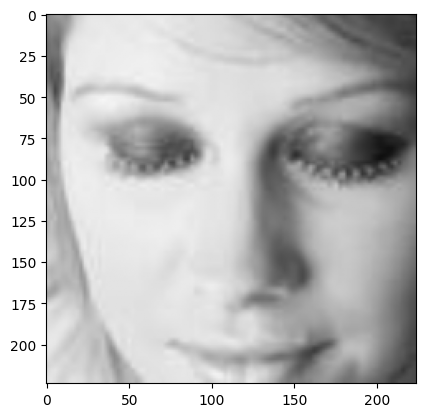

1/1 [==============================] - 0s 34ms/step
True Label: Closed
Prediction: Closed


In [29]:
import random

# Choose a random index from the testing set
random_index = random.randint(0, len(X_test) - 1)

# Get the corresponding image and label from the testing set
X_input = X_test[random_index]
y_true = y_test[random_index]

# Display the image
plt.imshow(X_input)
plt.show()

# Prepare the input for prediction

# Set a threshold value
threshold = 0.9

# Predict using the model
prediction = new_model.predict(X_input.reshape(1, img_size, img_size, 3))

# Determine the label based on the threshold
if prediction >= threshold:
    label = "Open"
else:
    label = "Closed"

# Convert the true label to a human-readable format
true_label = "Open" if y_true == 1 else "Closed"

# Convert the prediction to a human-readable format
predicted_label = "Open" if prediction >= threshold else "Closed"

print("True Label:", true_label)
print("Prediction:", predicted_label)


### 2nd version

1/1 [==============================] - 0s 16ms/step
Predicted Class: Open Eyes
True Label: Open Eyes


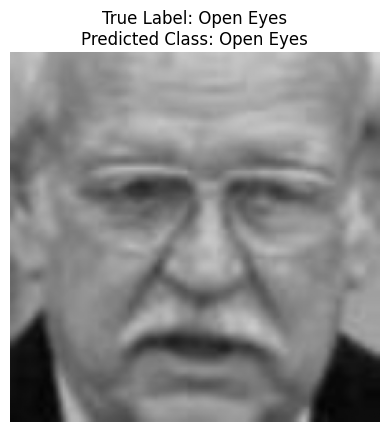

In [30]:
# Choose an index of the image from the test set
image_index = 0  

# Get the image and its corresponding true label
test_image = X_test[image_index]
true_label = y_test[image_index]

# Reshape the image to match the model's input shape
test_image_reshaped = test_image.reshape(-1, img_size, img_size, 3)

# Predict the class of the image
prediction = new_model.predict(test_image_reshaped)

# Convert the prediction to a binary class (0 or 1)
predicted_class = 1 if prediction > 0.9 else 0

# Define class labels
class_labels = ['Closed Eyes', 'Open Eyes']

# Print the prediction result
print("Predicted Class:", class_labels[predicted_class])
print("True Label:", class_labels[true_label])

# Display the image
plt.imshow(test_image)
plt.title("True Label: " + class_labels[true_label] + "\nPredicted Class: " + class_labels[predicted_class])
plt.axis('off')
plt.show()


### Test Random Image

In [ ]:
import cv2
import numpy as np

# Load the image you want to test
test_image = cv2.imread('10.jpg')

# Preprocess the image (resize, normalize, etc.)
test_image = cv2.resize(test_image, (img_size, img_size))
test_image = test_image / 255.0  # Normalize pixel values to [0, 1]
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = new_model.predict(test_image)

# Convert the prediction to a binary class (0 or 1)
predicted_class = 1 if prediction > 0.9 else 0

# Define class labels
class_labels = ['Closed Eyes', 'Open Eyes']

# Print the prediction result
print("Predicted Class:", class_labels[predicted_class])

# Convert the image back to 8-bit integers for display
display_image = (test_image[0] * 255).astype(np.uint8)

# Display the image
plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
plt.title("Predicted Class: " + class_labels[predicted_class])
plt.axis('off')
plt.show()

In [31]:
# Visualize the training loss
import plotly.offline as pyo
import plotly.graph_objs as go

# Extract the training losses and number of epochs
train_losses = train_model.history['loss']
epochs = len(train_losses)

# Plot the results
trace_train = go.Scatter(
    x=list(range(1, epochs + 1)),
    y=train_losses,
    mode='lines+markers',
    name='Train Loss'
)

layout = go.Layout(
    title='ُTraining Loss per Epoch (L/E)',
    xaxis=dict(title='Epoch'),
    yaxis=dict(title='Loss'),
    hovermode='closest'
)

fig = go.Figure(data=[trace_train], layout=layout)

pyo.iplot(fig)

In [32]:
#  Visualize the training and validation loss
import plotly.offline as pyo
import plotly.graph_objs as go

def visualize_training_loss(train_model):
    # Extract the training and validation losses, and number of epochs
    train_losses = train_model.history['loss']
    val_losses = train_model.history['val_loss']
    epochs = len(train_losses)

    # Plot the results
    trace_train = go.Scatter(
        x=list(range(1, epochs + 1)),
        y=train_losses,
        mode='lines+markers',
        name='Train Loss'
    )

    trace_val = go.Scatter(
        x=list(range(1, epochs + 1)),
        y=val_losses,
        mode='lines+markers',
        name='Validation Loss'
    )

    layout = go.Layout(
        title='Loss per Epoch (L/E)',
        xaxis=dict(title='Epoch'),
        yaxis=dict(title='Loss'),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_train, trace_val], layout=layout)

    pyo.iplot(fig)

# Call the visualize_training_loss function with the train_model object from Cell 1
visualize_training_loss(train_model)

In [33]:
# Visualize the training and testing accuracy
import plotly.offline as pyo
import plotly.graph_objs as go

def visualize_accuracy(train_model):
    # Extract the training and validation accuracies, and number of epochs
    train_acc = train_model.history['accuracy']
    val_acc = train_model.history['val_accuracy']
    epochs = len(train_acc)

    # Plot the accuracies
    trace_train_acc = go.Scatter(
        x=list(range(1, epochs + 1)),
        y=train_acc,
        mode='lines+markers',
        name='Train Accuracy'
    )

    trace_val_acc = go.Scatter(
        x=list(range(1, epochs + 1)),
        y=val_acc,
        mode='lines+markers',
        name='Validation Accuracy'
    )

    layout = go.Layout(
        title='Accuracy per Epoch',
        xaxis=dict(title='Epoch'),
        yaxis=dict(title='Accuracy'),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_train_acc, trace_val_acc], layout=layout)

    # Display the plot
    pyo.iplot(fig)

# Call the visualize_accuracy function with the train_model object from Cell 1
visualize_accuracy(train_model)

In [34]:
# Evaluate the model on the testing data and print the test accuracy
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

12/12 [==============================] - 1s 80ms/step - loss: 0.0388 - accuracy: 0.9918
Test Accuracy: 0.9917582273483276
